In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

In [2]:
## żródło: http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :param train_sizes:
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [3]:
df = pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [5]:
df.drop(df.columns[[2, 3, 4]], axis=1, inplace=True)
df['v1'] = df['v1'].astype('category').cat.codes
df.rename(index=str, columns={"v1": "isspam", "v2": "text"}, inplace=True)
df = df[['text', 'isspam']]
df.head()

,text,isspam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
# Preprocess:
# lowercase
df.text = df.text.str.lower()
# numbers
df.text = df.text.str.replace('\d+', ' number ')
# urls
df.text = df.text.str.replace('(http|https)://[^\s]*', ' httpaddr ')
# email adresses
df.text = df.text.str.replace('[^\s]+@[^\s]+', ' emailaddr ')

df.head()

,text,isspam
0,"go until jurong point, crazy.. available only ...",0
1,ok lar... joking wif u oni...,0
2,free entry in number a wkly comp to win fa c...,1
3,u dun say so early hor... u c already then say...,0
4,"nah i don't think he goes to usf, he lives aro...",0


In [7]:
df[df['text'].str.contains("[£]+")].head(10)

,text,isspam
5,freemsg hey there darling it's been number w...,1
8,winner!! as a valued network customer you have...,1
12,urgent! you have won a number week free memb...,1
34,thanks for your subscription to ringtone uk yo...,1
65,"as a valued customer, i am pleased to advise y...",1
67,urgent ur awarded a complimentary trip to euro...,1
93,please call our customer service representativ...,1
113,gent! we are trying to contact you. last weeke...,1
116,you are a winner u have been specially selecte...,1
120,urgent! your mobile no. was awarded å£ number ...,1


In [8]:
df[df['text'].str.contains("&lt;#&gt;")].head()

,text,isspam
44,great! i hope you like your man well endowed. ...,0
51,"a gram usually runs like &lt;#&gt; , a half e...",0
78,does not operate after &lt;#&gt; or what,0
177,turns out my friends are staying for the whole...,0
199,"found it, enc &lt;#&gt; , where you at?",0


In [9]:
df[df['text'].str.contains("<|>")].head()

,text,isspam
11,six chances to win cash! from number to num...,1
15,"xxxmobilemovieclub: to use your credit, click ...",1
308,themob> check out our newest selection of cont...,1
689,<forwarded from number >please call number ...,1
1612,rt-king pro video club>> need help? emailaddr...,1


In [10]:
df[df['text'].str.contains("&lt;#&gt;")].groupby('isspam').describe()

text                                                               
       count unique                                                top freq
isspam                                                                     
0        214    197  house-maid is the murderer, coz the man was mu...    3

In [11]:
df[df['text'].str.contains("<|>")].groupby('isspam').describe()

text                                                               
       count unique                                                top freq
isspam                                                                     
1         19     18  six chances to win cash! from  number  to  num...    2

In [12]:
df.shape

(5572, 2)

In [13]:
df.text = df.text.str.replace('&lt;#&gt;', ' impltgt ')
df.text = df.text.str.replace('<|>', ' expltgt ')
df.text = df.text.str.replace('[^a-zA-Z0-9\s]+', ' othersym ')
df.text = df.text.str.replace('\s+', ' ')
df.head()

,text,isspam
0,go until jurong point othersym crazy othersym ...,0
1,ok lar othersym joking wif u oni othersym,0
2,free entry in number a wkly comp to win fa cup...,1
3,u dun say so early hor othersym u c already th...,0
4,nah i don othersym t think he goes to usf othe...,0


In [14]:
count_vect = CountVectorizer(max_df=0.99, min_df=0.01)
X = count_vect.fit_transform(df.text)
y = df.isspam
X.shape

(5572, 217)

In [15]:
X

<5572x217 sparse matrix of type '<class 'numpy.int64'>'
	with 47195 stored elements in Compressed Sparse Row format>

In [17]:
# Shuffle for learning curves
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

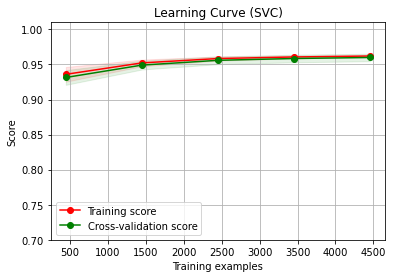

In [18]:
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', gamma=0.001, C=1.0)
plot_learning_curve(model_svc, 'Learning Curve (SVC)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

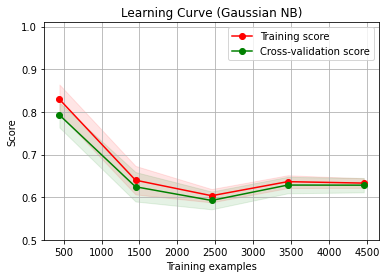

In [19]:
from sklearn.naive_bayes import GaussianNB
model_gnb = GaussianNB()
plot_learning_curve(model_gnb, 'Learning Curve (Gaussian NB)', X.toarray(), y, (0.5, 1.01), cv=cv, n_jobs=4)
plt.show()

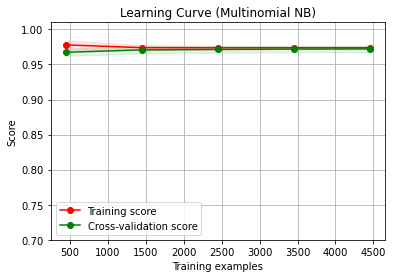

In [20]:
from sklearn.naive_bayes import MultinomialNB
model_mnb = MultinomialNB()
plot_learning_curve(model_mnb, 'Learning Curve (Multinomial NB)', X.toarray(), y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

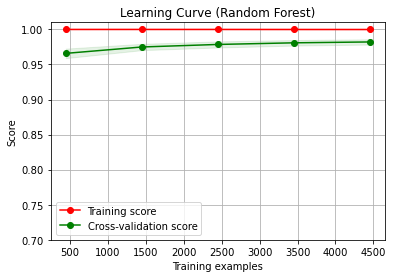

In [21]:
from sklearn.ensemble import RandomForestClassifier
model_rb = RandomForestClassifier(random_state=0)
plot_learning_curve(model_rb, 'Learning Curve (Random Forest)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

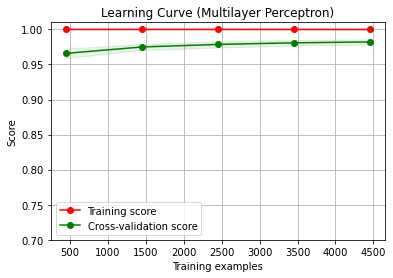

In [22]:
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier()
plot_learning_curve(model_rb, 'Learning Curve (Multilayer Perceptron)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()